In [2]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Using the best color style for graph
sns.set()
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error

## Q1 Linear Regression

In [3]:
data_path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
regression_part1 = pd.read_csv(data_path, delimiter = ',')
regression_part1.head(5)
# focus on size, data ranges, and data types
row,col=regression_part1.shape
print('Data Description:\nNumber of data:{0}\nNumber of Attribute:{1}'.format(row,col))
regression_part1.describe()
print('Data size is:',regression_part1.size)
regression_part1.dtypes
#print('revision_time range from',regression_part1.loc[regression_part1['revision_time']].max())
regression_part1.describe()

Data Description:
Number of data:50
Number of Attribute:2
Data size is: 100


,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


#### (b) (3 points) Fit a linear model to the data so that we can predict exam_score from
revision_time. Report the estimated model parameters w. Describe what the parameters represent for this 1D data. For this part, you should use the sklearn implementation
of Linear Regression.
Hint: By default in sklearn fit_intercept = True. Instead, set fit_intercept =
False and pre-pend 1 to each value of xi yourself to create φ(xi) = [1, xi
].

In [4]:
q1_one = np.ones((50,1))
q1_x0=regression_part1['revision_time'].as_matrix()
x_semi = q1_x0.reshape(50,1)
q1_xtrain = np.concatenate((q1_one,x_semi),axis=1)
q1_xtrain

/Users/jishenshen/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([[ 1.   ,  2.723],
       [ 1.   ,  2.844],
       [ 1.   ,  3.303],
       [ 1.   ,  3.588],
       [ 1.   ,  4.05 ],
       [ 1.   ,  4.08 ],
       [ 1.   ,  5.674],
       [ 1.   ,  6.06 ],
       [ 1.   ,  6.347],
       [ 1.   ,  6.819],
       [ 1.   ,  7.098],
       [ 1.   ,  7.515],
       [ 1.   ,  8.356],
       [ 1.   ,  9.214],
       [ 1.   , 10.364],
       [ 1.   , 10.51 ],
       [ 1.   , 12.102],
       [ 1.   , 13.187],
       [ 1.   , 16.692],
       [ 1.   , 16.977],
       [ 1.   , 18.33 ],
       [ 1.   , 19.599],
       [ 1.   , 20.321],
       [ 1.   , 21.28 ],
       [ 1.   , 21.578],
       [ 1.   , 21.798],
       [ 1.   , 22.048],
       [ 1.   , 24.949],
       [ 1.   , 25.147],
       [ 1.   , 26.495],
       [ 1.   , 26.535],
       [ 1.   , 28.687],
       [ 1.   , 29.055],
       [ 1.   , 31.043],
       [ 1.   , 32.176],
       [ 1.   , 32.203],
       [ 1.   , 32.226],
       [ 1.   , 32.268],
       [ 1.   , 32.711],
       [ 1.   , 32.886],


In [5]:
q1_xtrain
q1_ytrain=regression_part1['exam_score']
#train  a simple  l i n e a r  regression  model
regressor=LinearRegression(fit_intercept=False)
regressor.fit(q1_xtrain , q1_ytrain)
q1_y_predict=regressor.predict(q1_xtrain)

In [6]:
weight_lg = regressor.coef_
weight_lg

array([17.89768026,  1.44114091])

#### (c) (3 points) Display the fitted linear model and the input data on the same plot

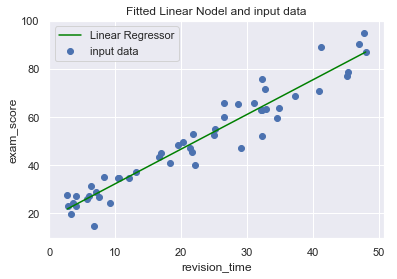

In [7]:
fig,ax = plt.subplots()
ax.plot(regression_part1['revision_time'],q1_y_predict,label='Linear Regressor',color='green')
ax.scatter(regression_part1['revision_time'],regression_part1['exam_score'],label='input data')

ax.set_ylabel('exam_score')
ax.set_xlabel('revision_time')
ax.set_title('Fitted Linear Nodel and input data')
ax.legend()
plt.show()
fig.savefig('q1c')

#### (d) (3 points) Instead of using sklearn, implement the closed-form solution for tting a
linear regression model yourself using numpy array operations. Report your code in the
answer box. It should only take a few lines (i.e. <5).
Hint: Only report the relevant lines for estimating w e.g. we do not need to see the data
loading code. You can write the code in the answer box directly or paste in an image of
it.

In [8]:
w_cf=np.dot(np.linalg.inv(np.dot(q1_xtrain.T,q1_xtrain)),np.dot(q1_xtrain.T,q1_ytrain))
w_cf

array([17.89768026,  1.44114091])

#### (e) (3 points) Mean Squared Error (MSE) is a common metric used for evaluating the
performance of regression models. Write out the expression for MSE and list one of its
limitations.
Hint: For notation, you can use y for the ground truth quantity and yˆ ($\hat{y}$ in
latex) in place of the model prediction.

In [9]:
def calculateMSE(X,Y,m,b):
    in_bracket = []
    for i in range(len(X)):
        num = Y[i] - m*X[i] - b
        num = pow(num,2)
        in_bracket.append(num)
     
    all_sum = sum(in_bracket)
    MSE = all_sum / len(X)
    
    return MSE

In [10]:
q1_MSE_regression = calculateMSE(regression_part1['revision_time'],q1_ytrain,1.44,17.9)
q1_MSE_regression

30.986252578783994

#### (f) (3 points) Our next step will be to evaluate the performance of the tted models using
Mean Squared Error (MSE). Report the MSE of the data in regression_part1.csv for
your prediction of exam_score. You should report the MSE for the linear model tted
using sklearn and the model resulting from your closed-form solution. Comment on any
dierences in their performance.

#### My answer here <br>
It's hard to compare both models using the mse above

#### (g) (4 points) Assume that the optimal value of w0 is 20, it is not but let's assume so for
now. Create a plot where you vary w1 from −2 to +2 on the horizontal axis, and report
the Mean Squared Error on the vertical axis for each setting of w = [w0, w1] across the
dataset. Describe the resulting plot. Where is its minimum? Is this value to be expected?
Hint: You can try 100 values of w1 i.e. w1 = np.linspace(-2,2, 100)

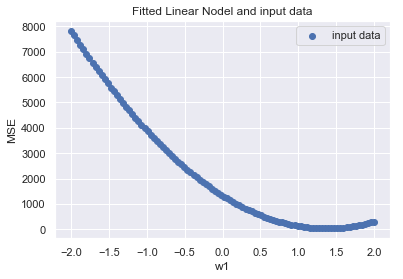

In [15]:
### set data
fig,ax = plt.subplots()
w0=20
w1 = np.linspace(-2,2, 100)
q1g_MSE_regression = calculateMSE(regression_part1['revision_time'],q1_ytrain,w1,w0)
#ax.plot(w1,q1g_MSE_regression,label='Linear Regressor')
ax.scatter(w1,q1g_MSE_regression,label='input data')

ax.set_ylabel('MSE')
ax.set_xlabel('w1')
ax.set_title('Fitted Linear Nodel and input data')
ax.legend()
fig.savefig('q1g')
plt.show()

32.48096161535148


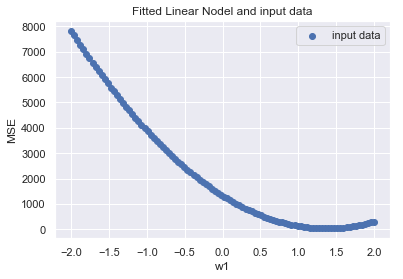

In [16]:
### set data
w1 = np.linspace(-2,2, 100)
q1g_MSE_regression=calculateMSE(regression_part1['revision_time'],q1_ytrain,w1,w0)
print(q1g_MSE_regression.min())

#ax.plot(w1,q1g_MSE_regression,label='Linear Regressor')
fig,ax = plt.subplots()
ax.scatter(w1,q1g_MSE_regression,label='input data')

ax.set_ylabel('MSE')
ax.set_xlabel('w1')
ax.set_title('Fitted Linear Nodel and input data')
ax.legend()
fig.savefig('q1g')
plt.show()

## Q2 Non linear regression

#### (a) (5 points) Fit four dierent polynomial regression models to the data by varying the
degree of polynomial features used i.e. M = 1 to 4. For example, M = 3 means that
φ(xi) = [1, xi, x2 i, x3i]. Plot the resulting models on the same plot and also include the
input data.
Hint: You can again use the sklearn implementation of Linear Regression and you can
also use PolynomialFeatures to generate the polynomial features. Again, set fit_intercept = False.

In [17]:
data_path2 = os.path.join(os.getcwd(), 'data', 'regression_part2.csv')
regression_part2 = pd.read_csv(data_path2, delimiter = ',')
regression_part2

,input,output
0,2.728,9.088
1,3.244,12.786
2,-4.164,-10.016
3,4.875,32.976
4,3.329,10.437
5,4.268,21.681
6,-2.879,-5.204
7,-2.276,-1.465
8,2.688,8.539
9,2.780,6.929


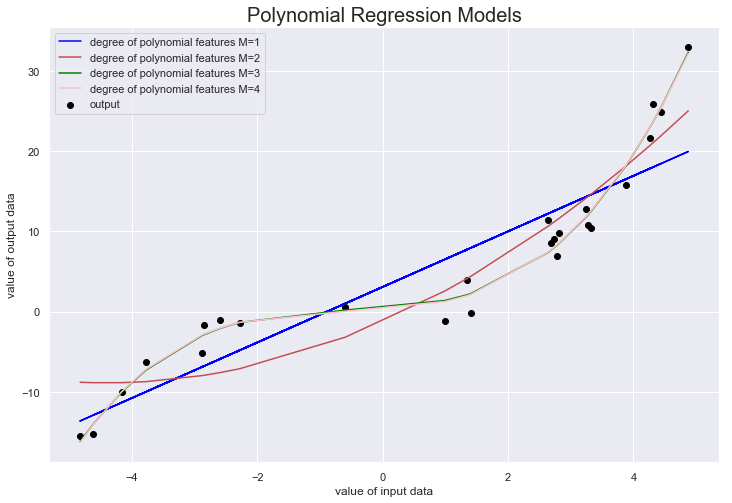

In [18]:
from sklearn.preprocessing import PolynomialFeatures
q2_one = np.ones((25,1))
q2_x=regression_part2['input'].values.reshape(-1,1)
q2_xtrain = np.concatenate((q2_one,q2_x),axis=1)
q2_ytrain = regression_part2['output']
#升维，为样本生成新的特征

# M = 2
poly2 = PolynomialFeatures(degree=2,interaction_only=False)
q2_x2=poly2.fit_transform(q2_xtrain)
#q2_x2=poly2.fit_transform(q2_x)
#print(q2_x2)

# M = 3
poly3 = PolynomialFeatures(degree=3,interaction_only=False)
q2_x3=poly3.fit_transform(q2_xtrain)

# M = 4
poly4 = PolynomialFeatures(degree=4,interaction_only=False)
q2_x4=poly4.fit_transform(q2_xtrain)


#对样本做训练

#M=1
lin_reg1 = LinearRegression(fit_intercept=False)
lin_reg1.fit(q2_xtrain,q2_ytrain)
lin_reg1_predict = lin_reg1.predict(q2_xtrain)

# M=2
lin_reg2 = LinearRegression(fit_intercept=False)
lin_reg2.fit(q2_x2,q2_ytrain)
lin_reg2_predict = lin_reg2.predict(q2_x2)
#print(lin_reg2.coef_)

# M=3
lin_reg3 = LinearRegression(fit_intercept=False)
lin_reg3.fit(q2_x3,q2_ytrain)
lin_reg3_predict = lin_reg3.predict(q2_x3)

# M=4
lin_reg4 = LinearRegression(fit_intercept=False)
lin_reg4.fit(q2_x4,q2_ytrain)
lin_reg4_predict = lin_reg4.predict(q2_x4)

#绘图
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.scatter(regression_part2['input'],
           regression_part2['output'],
           color='black')

# M =1 
ax.plot(regression_part2['input'],
        lin_reg1_predict,color='blue', 
        label='degree of polynomial features M=1')

# M = 2
from sklearn.pipeline import Pipeline
ax.plot(np.sort(regression_part2['input']),
        lin_reg2_predict[np.argsort(regression_part2['input'])],
        label='degree of polynomial features M=2',
        color='r')

# M =3
ax.plot(np.sort(regression_part2['input']),
        lin_reg3_predict[np.argsort(regression_part2['input'])],
        label='degree of polynomial features M=3',
        color='green')
# M =4
ax.plot(np.sort(regression_part2['input']),lin_reg4_predict[np.argsort(regression_part2['input'])],label='degree of polynomial features M=4',color='pink')
      
ax.set_ylabel('value of output data')
ax.set_xlabel('value of input data')
ax.set_title('Polynomial Regression Models',fontsize=20)
ax.legend(loc='upper left')
plt.show()
fig.savefig('q2a')

#### (b) (3 points) Create a bar plot where you display the Mean Squared Error of each of the
four dierent polynomial regression models from the previous question.

In [19]:
# M = 1
from sklearn.metrics import mean_squared_error
q2_M1_mse = mean_squared_error(regression_part2['output'],lin_reg1_predict)

# M = 2
q2_M2_mse = mean_squared_error(regression_part2['output'],lin_reg2_predict)

# M =3 
q2_M3_mse = mean_squared_error(regression_part2['output'],lin_reg3_predict)

# M =4
q2_M4_mse = mean_squared_error(regression_part2['output'],lin_reg4_predict)

print(q2_M3_mse,q2_M4_mse)

2.744756719252426 2.7389111790755383


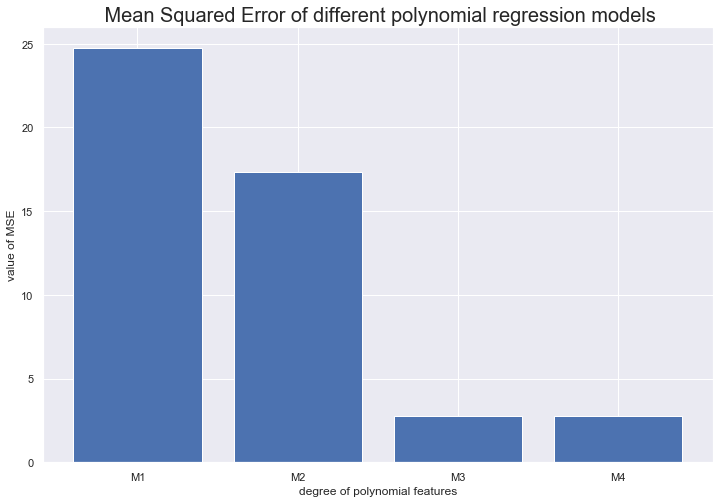

In [20]:
mse_x = ['M1','M2','M3','M4']
mse_y = [q2_M1_mse,q2_M2_mse,q2_M3_mse,q2_M4_mse]


fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.bar(mse_x,mse_y)
# for index,value in mse_y:
#     plt.text(value,index,str(value))
ax.set_ylabel('value of MSE')
ax.set_xlabel('degree of polynomial features')
ax.set_title(' Mean Squared Error of different polynomial regression models',fontsize=20)
plt.show()
fig.savefig('q2b')

#### (c) (4 points) Comment on the t and Mean Squared Error values of the M = 3 and M = 4
polynomial regression models. Do they result in the same or dierent performance? Based
on these results, which model would you choose?

#### My answer here
Mean Square Error which is used to measure the accuracy is slightly from 2.744756719252426(M3) 2.7389111790755383(M4), since the lower the mse, the better the model fits the data. M3 and M4 is almost same, so there is no much difference on performace, and m4 is slightly better.

#### (d) (6 points) Instead of using polynomial basis functions, in this nal part we will use
another type of basis function - radial basis functions (RBF). Specically, we will dene
φ(xi) = [1, rbf(xi
; c1, α), rbf(xi
; c2, α), rbf(xi
; c3, α), rbf(xi
; c4, α)], where rbf(x; c, α) =
exp(−0.5(x − c)
2/α2
) is an RBF kernel with center c and width α. Note that in this
example, we are using the same width α for each RBF, but dierent centers for each.
Let c1 = −4.0, c2 = −2.0, c3 = 2.0, and c4 = 4.0 and plot the resulting nonlinear
predictions using the regression_part2.csv dataset for α ∈ {0.2, 100, 1000}. You can
plot all three results on the same gure. Comment on the impact of larger or smaller
values of α.

In [21]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

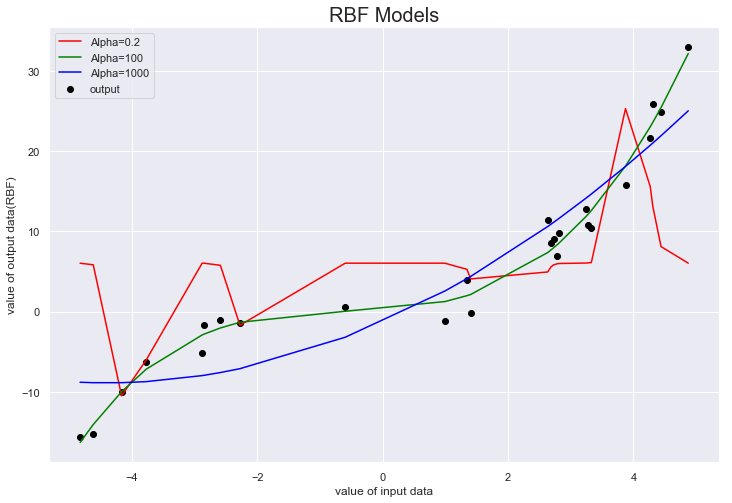

In [22]:
def rbf_fi(x,c,a):
    return np.exp((-0.5)*(x-c)*(x-c)/(a*a)).values.reshape(-1,1)
    
### a = 0.2 
q2_one = np.ones((25,1))
a1_c1 = rbf_fi(regression_part2['input'],-4.0,0.2)
a1_c2 = rbf_fi(regression_part2['input'],-2.0,0.2)
a1_c3 = rbf_fi(regression_part2['input'],2.0,0.2)
a1_c4 = rbf_fi(regression_part2['input'],4.0,0.2)
x_a1 =  np.concatenate((q2_one,a1_c1,a1_c2,a1_c3,a1_c4),axis=1)

# a = 100
a2_c1 = rbf_fi(regression_part2['input'],-4.0,100)
a2_c2 = rbf_fi(regression_part2['input'],-2.0,100)
a2_c3 = rbf_fi(regression_part2['input'],2.0,100)
a2_c4 = rbf_fi(regression_part2['input'],4.0,100)
x_a2 =  np.concatenate((q2_one,a2_c1,a2_c2,a2_c3,a2_c4),axis=1)

# a = 1000
a3_c1 = rbf_fi(regression_part2['input'],-4.0,1000)
a3_c2 = rbf_fi(regression_part2['input'],-2.0,1000)
a3_c3 = rbf_fi(regression_part2['input'],2.0,1000)
a3_c4 = rbf_fi(regression_part2['input'],4.0,1000)
x_a3 =  np.concatenate((q2_one,a3_c1,a3_c2,a3_c3,a3_c4),axis=1)


### train the dataset

# a =0.2
reg_a1 = LinearRegression(fit_intercept=False)
reg_a1.fit(x_a1,regression_part2['output'])
a1_predict = reg_a1.predict(x_a1)
#q2_reg_rbf_c1_a1_predict

#a = 100
reg_a2 = LinearRegression(fit_intercept=False)
reg_a2.fit(x_a2,regression_part2['output'])
a2_predict = reg_a2.predict(x_a2)

# a = 1000
reg_a3 = LinearRegression(fit_intercept=False)
reg_a3.fit(x_a3,regression_part2['output'])
a3_predict = reg_a3.predict(x_a3)


# draw plot

fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.scatter(regression_part2['input'],regression_part2['output'],color='black')

#a=0.2
ax.plot(np.sort(regression_part2['input']),
        a1_predict[np.argsort(regression_part2['input'])],
        label = 'Alpha=0.2',
        color = 'red')

# a = 100
ax.plot(np.sort(regression_part2['input']),
        a2_predict[np.argsort(regression_part2['input'])],
        label = 'Alpha=100',
        color = 'green')

# a = 1000
ax.plot(np.sort(regression_part2['input']),
        a3_predict[np.argsort(regression_part2['input'])],
        label = 'Alpha=1000',
        color = 'blue')

ax.set_ylabel('value of output data(RBF)')
ax.set_xlabel('value of input data')
ax.set_title('RBF Models',fontsize=20)
ax.legend()
plt.show()
fig.savefig('q2d')

## need comment here

## Q3 Decision Trees

In [61]:
data_path3_1 = os.path.join(os.getcwd(), 'data', 'faces_train_data.csv')
faces_train = pd.read_csv(data_path3_1, delimiter = ',')
data_path3_2 = os.path.join(os.getcwd(), 'data', 'faces_test_data.csv')
faces_test = pd.read_csv(data_path3_2, delimiter = ',')


657600

In [64]:
row1,col1=faces_train.shape
print('Data Description:\nNumber of data:{0}\nNumber of Attribute:{1}'.format(row1,col1))
print('Data size is:',train_smile.size)
print(faces_train.dtypes)
faces_train.describe()

Data Description:
Number of data:4800
Number of Attribute:137
Data size is: 319895
x0         float64
y0         float64
x1         float64
y1         float64
x2         float64
y2         float64
x3         float64
y3         float64
x4         float64
y4         float64
x5         float64
y5         float64
x6         float64
y6         float64
x7         float64
y7         float64
x8         float64
y8         float64
x9         float64
y9         float64
x10        float64
y10        float64
x11        float64
y11        float64
x12        float64
y12        float64
x13        float64
y13        float64
x14        float64
y14        float64
            ...   
y53        float64
x54        float64
y54        float64
x55        float64
y55        float64
x56        float64
y56        float64
x57        float64
y57        float64
x58        float64
y58        float64
x59        float64
y59        float64
x60        float64
y60        float64
x61        float64
y61        float64
x62  

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,...,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,-1.931962,1.455752,-1.920338,1.004314,-1.858298,0.545549,-1.744761,0.089065,-1.550913,-0.333587,...,-0.111277,0.687324,-0.106768,0.223960,-0.263222,0.005834,-0.288294,-0.211278,-0.269045,0.486458
std,0.590181,0.402155,0.552056,0.380052,0.532371,0.361070,0.523245,0.343751,0.491355,0.321495,...,0.050815,0.209837,0.148709,0.086788,0.148332,0.073380,0.147636,0.083300,0.148305,0.499869
min,-3.979000,-2.111000,-3.872000,-2.054000,-3.737000,-1.940000,-3.468000,-2.180000,-3.071000,-2.345000,...,-0.319000,-0.441000,-0.897000,-0.448000,-1.142000,-0.597000,-1.162000,-0.746000,-1.154000,0.000000
25%,-2.241000,1.247750,-2.204000,0.812750,-2.142250,0.361750,-2.039250,-0.086000,-1.839000,-0.505000,...,-0.142000,0.582000,-0.191000,0.188000,-0.356000,-0.024000,-0.383000,-0.252000,-0.361000,0.000000
50%,-1.952000,1.456000,-1.931000,1.011000,-1.854000,0.561000,-1.751000,0.104000,-1.576500,-0.319000,...,-0.110000,0.701000,-0.102000,0.224000,-0.242000,0.000000,-0.266000,-0.213000,-0.247000,0.000000
75%,-1.628750,1.676000,-1.626000,1.212250,-1.557750,0.750000,-1.451000,0.285250,-1.276000,-0.141000,...,-0.078000,0.823250,-0.018000,0.266000,-0.147000,0.035250,-0.169000,-0.175000,-0.152000,1.000000
max,1.984000,3.461000,1.617000,3.132000,1.213000,2.747000,0.808000,2.473000,0.655000,2.296000,...,0.288000,1.387000,0.725000,0.725000,0.336000,0.544000,0.144000,0.369000,0.318000,1.000000


In [65]:
row2,col2=faces_test.shape
print('Data Description:\nNumber of data:{0}\nNumber of Attribute:{1}'.format(row2,col2))
print('Data size is:',faces_test.size)
print(faces_train.dtypes)

Data Description:
Number of data:1200
Number of Attribute:137
Data size is: 164400
x0         float64
y0         float64
x1         float64
y1         float64
x2         float64
y2         float64
x3         float64
y3         float64
x4         float64
y4         float64
x5         float64
y5         float64
x6         float64
y6         float64
x7         float64
y7         float64
x8         float64
y8         float64
x9         float64
y9         float64
x10        float64
y10        float64
x11        float64
y11        float64
x12        float64
y12        float64
x13        float64
y13        float64
x14        float64
y14        float64
            ...   
y53        float64
x54        float64
y54        float64
x55        float64
y55        float64
x56        float64
y56        float64
x57        float64
y57        float64
x58        float64
y58        float64
x59        float64
y59        float64
x60        float64
y60        float64
x61        float64
y61        float64
x62  

In [24]:
#### starting from here
#### smailing dataset for training 
train_smile=faces_train.loc[faces_train['smiling'] ==1.000000]
smile_train_input = train_smile.drop('smiling',axis='columns')
smile_train_output = train_smile['smiling']

row,col=train_smile.shape
print('Data Description:\nNumber of data:{0}\nNumber of Attribute:{1}'.format(row,col))
print('Data size is:',train_smile.size)
train_smile.dtypes
train_smile.describe()

Data Description:
Number of data:2335
Number of Attribute:137
Data size is: 319895


,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.0
mean,-1.940654,1.439154,-1.929619,0.983212,-1.872268,0.520067,-1.763248,0.056192,-1.566910,-0.372860,...,-0.097063,0.769910,-0.061879,0.250046,-0.316350,0.007355,-0.346702,-0.235599,-0.323695,1.0
std,0.492410,0.336540,0.455225,0.319344,0.432446,0.305847,0.423472,0.292947,0.399184,0.274225,...,0.044433,0.190458,0.137111,0.079433,0.139735,0.070827,0.137861,0.078284,0.137920,0.0
min,-3.719000,-0.084000,-3.616000,-0.507000,-3.520000,-0.957000,-3.293000,-1.351000,-2.906000,-1.661000,...,-0.276000,-0.055000,-0.828000,-0.215000,-1.027000,-0.378000,-1.094000,-0.640000,-1.083000,1.0
25%,-2.209500,1.253000,-2.171000,0.813000,-2.096500,0.358000,-1.995500,-0.100000,-1.800000,-0.523000,...,-0.126000,0.668500,-0.141000,0.213000,-0.400500,-0.025500,-0.431000,-0.278000,-0.408000,1.0
50%,-1.947000,1.442000,-1.929000,0.987000,-1.858000,0.531000,-1.763000,0.076000,-1.580000,-0.355000,...,-0.095000,0.788000,-0.059000,0.250000,-0.324000,0.000000,-0.358000,-0.234000,-0.330000,1.0
75%,-1.675000,1.636500,-1.666500,1.171000,-1.622500,0.700000,-1.518500,0.230000,-1.336000,-0.201000,...,-0.068000,0.894000,0.022000,0.294000,-0.218000,0.041000,-0.250500,-0.195000,-0.226000,1.0
max,0.214000,3.210000,-0.080000,2.655000,-0.336000,2.099000,-0.357000,1.482000,-0.211000,0.864000,...,0.099000,1.387000,0.553000,0.723000,-0.000000,0.428000,-0.059000,0.186000,0.033000,1.0


In [25]:
#### smiling: train target data

print('Data size is:',smile_train_output.size)
smile_train_output.dtypes
smile_train_output.describe()

Data size is: 2335


count    2335.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: smiling, dtype: float64

In [26]:
train_unsmile=faces_train.loc[faces_train['smiling'] !=1.000000]
unsmile_train_input = train_unsmile.drop('smiling',axis='columns')
unsmile_train_output = train_unsmile['smiling']

row,col=unsmile_train_input.shape
print('Data Description:\nNumber of data:{0}\nNumber of Attribute:{1}'.format(row,col))
print('Data size is:',unsmile_train_input.size)
unsmile_train_input.dtypes
unsmile_train_input.describe()

Data Description:
Number of data:2465
Number of Attribute:136
Data size is: 335240


,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x63,y63,x64,y64,x65,y65,x66,y66,x67,y67
count,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.00000,2465.000000,...,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000
mean,-1.923728,1.471475,-1.911546,1.024303,-1.845065,0.569687,-1.727250,0.120204,-1.53576,-0.296385,...,0.191834,-0.124742,0.609094,-0.149288,0.199250,-0.212896,0.004393,-0.232967,-0.188240,-0.217277
std,0.669758,0.455191,0.630175,0.428830,0.611962,0.405107,0.602278,0.383223,0.56463,0.356690,...,0.055360,0.052785,0.197007,0.146782,0.086241,0.138378,0.075705,0.134734,0.081351,0.138953
min,-3.979000,-2.111000,-3.872000,-2.054000,-3.737000,-1.940000,-3.468000,-2.180000,-3.07100,-2.345000,...,-0.232000,-0.319000,-0.441000,-0.897000,-0.448000,-1.142000,-0.597000,-1.162000,-0.746000,-1.154000
25%,-2.289000,1.242000,-2.260000,0.812000,-2.199000,0.366000,-2.088000,-0.073000,-1.88300,-0.484000,...,0.174000,-0.158000,0.528000,-0.229000,0.173000,-0.264000,-0.022000,-0.280000,-0.227000,-0.270000
50%,-1.960000,1.480000,-1.931000,1.039000,-1.852000,0.594000,-1.743000,0.147000,-1.57200,-0.271000,...,0.201000,-0.124000,0.636000,-0.144000,0.206000,-0.177000,0.000000,-0.193000,-0.199000,-0.183000
75%,-1.574000,1.723000,-1.552000,1.256000,-1.472000,0.796000,-1.353000,0.343000,-1.19200,-0.083000,...,0.224000,-0.091000,0.733000,-0.062000,0.235000,-0.126000,0.031000,-0.150000,-0.162000,-0.130000
max,1.984000,3.461000,1.617000,3.132000,1.213000,2.747000,0.808000,2.473000,0.65500,2.296000,...,0.344000,0.288000,1.211000,0.725000,0.725000,0.336000,0.544000,0.144000,0.369000,0.318000


In [27]:
#### smiling dataset for testing
test_smile=faces_test.loc[faces_test['smiling'] ==1.000000]
smile_test_input = test_smile.drop('smiling',axis='columns')
smile_test_output = test_smile['smiling']

row,col=test_smile.shape
print('Data Description:\nNumber of data:{0}\nNumber of Attribute:{1}'.format(row,col))
print('Data size is:',test_smile.size)
test_smile.dtypes
test_smile.describe()

Data Description:
Number of data:592
Number of Attribute:137
Data size is: 81104


,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,...,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.0
mean,-1.923441,1.469958,-1.917431,1.012838,-1.864934,0.546645,-1.759900,0.080880,-1.565791,-0.349610,...,-0.095791,0.766341,-0.059873,0.246079,-0.309954,0.004253,-0.338899,-0.235488,-0.314767,1.0
std,0.482960,0.351248,0.444255,0.335878,0.421525,0.321031,0.416766,0.306043,0.398164,0.284367,...,0.043272,0.186377,0.135483,0.078896,0.131979,0.072609,0.128769,0.080761,0.127797,0.0
min,-3.327000,-1.039000,-3.286000,-1.385000,-3.253000,-1.707000,-3.109000,-1.954000,-2.793000,-2.053000,...,-0.229000,0.122000,-0.526000,-0.098000,-0.895000,-0.377000,-0.951000,-0.613000,-0.932000,1.0
25%,-2.201250,1.261750,-2.172250,0.830000,-2.124000,0.384000,-2.005250,-0.084000,-1.808000,-0.500750,...,-0.126000,0.664000,-0.138250,0.208000,-0.397000,-0.029000,-0.417250,-0.282000,-0.401250,1.0
50%,-1.934000,1.462500,-1.915000,1.005500,-1.860500,0.532500,-1.762000,0.075000,-1.582000,-0.352000,...,-0.093000,0.781000,-0.053500,0.247000,-0.318500,0.000000,-0.350000,-0.236000,-0.326000,1.0
75%,-1.680000,1.649000,-1.684750,1.184750,-1.630500,0.712250,-1.531500,0.246000,-1.367750,-0.193000,...,-0.066750,0.884000,0.023000,0.290000,-0.220750,0.037250,-0.250000,-0.196000,-0.220000,1.0
max,0.000000,3.641000,-0.256000,3.205000,-0.475000,2.718000,-0.487000,2.179000,-0.279000,1.564000,...,0.074000,1.269000,0.388000,0.603000,-0.000000,0.411000,-0.038000,0.218000,0.025000,1.0


In [28]:
#### smiling: test target data
print('Data size is:',smile_test_output.size)
smile_test_output.dtypes
smile_test_output.describe()

Data size is: 592


count    592.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: smiling, dtype: float64

#### (b) (4 points) Even though the input attributes are high dimensional, they actually consist
of a set of 2D coordinates representing points on the faces of each person in the dataset.
Create a scatter plot of the average location for each 2D coordinate. One for (i) smiling
and (ii) one not smiling faces. For instance, in the case of smiling faces, you would
average each of the rows where smiling = 1. You can plot both on the same gure,
but use dierent colors for each of the two cases. Comment on any dierence you notice
between the two sets of points.
Hint: Your plot should contain two faces.

smile


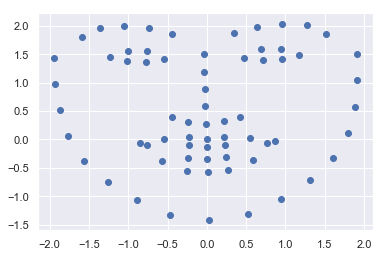


not smile


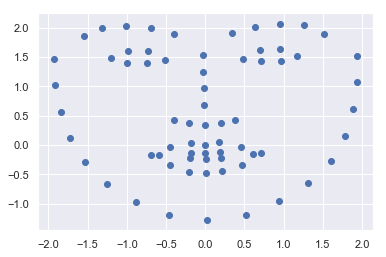

In [29]:
### define faceplot function
def faceplot(series):
    reindex=0
    xlist = []
    ylist = []
    
    for index, value in series.items():
        if reindex % 2 == 0:
            xlist.append(value)
        else:
            ylist.append(value)
        
        reindex = reindex +1

    
    plt.scatter(x=xlist, y = ylist)
    plt.show()
    
### draw face
print('smile')
strain_mean = train_smile.mean().drop('smiling')
faceplot(strain_mean)

print('\nnot smile')
nonstrain_mean = train_unsmile.mean().drop('smiling')
faceplot(nonstrain_mean)


#### (c) (2 points) There are dierent measures that can be used in decision trees when evaluating the quality of a split. What measure of purity at a node does the DecisionTreeClassier
in sklearn use for classication by default? What is the advantage, if any, of using this
measure compared to entropy?

DecisionTree in sklearn uses <b>"gini"</b> criteria to measure the quality of a split by default.
Advantage: 
1. Gini Index isn’t computationally intensive as it doesn’t involve the logarithm function used to calculate entropy in information gain, so you don't need to compute the log, which can make it a little bit faster in your implementation.
2. Gini’s maximum impurity is 0.5 and maximum purity is 0, Entropy’s maximum impurity is 1 and maximum purity is 0. lower the gini impurity, the higher quality of data

#### (d) (3 points) One of the hyper-parameters of a decision tree classier is the maximum
depth of the tree. What impact does smaller or larger values of this parameter have?
Give one potential problem for small values and two for large values.

#### imapct
<b>small value of max_depth:</b>
1. The model will underfit sohow to find the best value

<b>large value for max_depth:</b>
1. In general, the deeper you allow your tree to grow, the more complex your model will become cause you will have more splits and it captures more information about the data 
2.  your model can not be able to generalize well on test set

#### (e) (6 points) Train three dierent decision tree classiers with a maximum depth of 2, 8,
and 20 respectively. Report the maximum depth, the training accuracy (in %), and the
test accuracy (in %) for each of the three trees. Comment on which model is best and
why it is best.
Hint: Set random_state = 2001 and use the predict() method of the DecisionTreeClassier so that you do not need to set a threshold on the output predictions. You can set the
maximum depth of the decision tree using the max_depth hyper-parameter

In [30]:
from sklearn import tree
from sklearn.metrics import accuracy_score

q4_xtrain = faces_train.drop(columns='smiling')
q4_ytrain = faces_train['smiling']
q4_xtest = faces_test.drop(columns = 'smiling')
q4_ytest = faces_test['smiling']

#### train model
# max_depth =2
tree_two=tree.DecisionTreeClassifier(random_state = 2001,max_depth=2)
tree_two=tree_two.fit(q4_xtrain, q4_ytrain)
tree_two

#max_depth = 8
tree_eight=tree.DecisionTreeClassifier(random_state = 2001,max_depth=8)
tree_eight=tree_eight.fit(q4_xtrain, q4_ytrain)
tree_eight

#max_depth = 20
tree_twenty =tree.DecisionTreeClassifier(random_state = 2001,max_depth=20)
tree_twenty=tree_twenty.fit(q4_xtrain, q4_ytrain)
tree_twenty


#### accuracy_score
#max_depth =2
ytrain_pre_two = tree_two.predict(q4_xtrain)
ytest_pre_two = tree_two.predict(q4_xtest)
train_accuray_two=accuracy_score(q4_ytrain,ytrain_pre_two)
test_accuray_two = accuracy_score(q4_ytest,ytest_pre_two)
print('max_depth=2:\nClassification accuracy on training dataset is',train_accuray_two)
print('Classification accuracy on training dataset is',test_accuray_two)

#max_depth = 8
ytrain_pre_eight = tree_eight.predict(q4_xtrain)
ytest_pre_eight = tree_eight.predict(q4_xtest)
train_accuray_eight=accuracy_score(q4_ytrain,ytrain_pre_eight)
test_accuray_eight = accuracy_score(q4_ytest,ytest_pre_eight)
print('\nmax_depth=8:\nClassification accuracy on training dataset is',train_accuray_eight)
print('Classification accuracy on training dataset is',test_accuray_eight)

#max_depth = 20
ytrain_pre_twenty = tree_twenty.predict(q4_xtrain)
ytest_pre_twenty = tree_twenty.predict(q4_xtest)
train_accuray_twenty=accuracy_score(q4_ytrain,ytrain_pre_twenty)
test_accuray_twenty = accuracy_score(q4_ytest,ytest_pre_twenty)
print('\nmax_depth=20:\nClassification accuracy on training dataset is',train_accuray_twenty)
print('Classification accuracy on training dataset is',test_accuray_twenty)
# print(accuracy_score)

max_depth=2:
Classification accuracy on training dataset is 0.7947916666666667
Classification accuracy on training dataset is 0.7816666666666666

max_depth=8:
Classification accuracy on training dataset is 0.9335416666666667
Classification accuracy on training dataset is 0.8408333333333333

max_depth=20:
Classification accuracy on training dataset is 1.0
Classification accuracy on training dataset is 0.8158333333333333


#### (f) (5 points) Report the names of the top three most important attributes, in order of
importance, according to the Gini importance from DecisionTreeClassier. Does the one
with the highest importance make sense in the context of this classication task?
Hint: Use the trained model with max_depth = 8 and again set random_state = 2001.

In [31]:
empty_dic={}
keys = q4_xtrain.columns.values
values = tree_eight.feature_importances_

def add(self, key, value): 
    for i in range(len(key)):
        self[key[i]] = value[i]
    return self

In [32]:
import_dic=add(empty_dic,keys,values)
sort_dic=sorted(import_dic.items(), key=lambda x: x[1])
sort_dic[-3:]

[('y29', 0.08831447209293988),
 ('y48', 0.08995881431599788),
 ('x50', 0.33040484928175073)]

In [33]:
q4_xtrain['x50'].std()

0.0381885294472481

The highest importance doesn't make sense in the context of this classication task. I tried to drop the x50 and there is no much difference of accuracy.and the std of x50 is also not high as well

#### (g) (2 points) Are there any limitations of the current choice of input attributes used i.e.
2D point locations? If so, name one.

<b>My answer here:</b>
1. if the the distance of face of camera is difference, the results of input attributes of one person maybe different.
2. the size and direction of the object will also affect the attribute results

# Question 4 : (14 total points) Evaluating Binary Classiers

You have been tasked with evaluating the performance of four dierent binary classication algorithms, alg_1, alg_2, alg_3, and alg_4. Unfortunately, you do not have access
to the models themselves, only their predictions on a held-out test set. Your goal is to
evaluate how well the dierent models perform at predicting the ground truth class labels
gt for this test set.
The dataset is contained in classification_eval_1.csv. You should load it into a
Pandas DataFrame using pandas.read_csv().

#### (a) (4 points)
Report the classication accuracy (in %) for each of the four dierent models using the gt attribute as the ground truth class labels. Use a threshold of >= 0.5 to convert the continuous classier outputs into binary predictions. 
Which model is the
best according to this metric? What, if any, are the limitations of the above method for
computing accuracy and how would you improve it without changing the metric used?

In [39]:
## load data
data_path4 = os.path.join(os.getcwd(), 'data', 'classification_eval_1.csv')
classification = pd.read_csv(data_path4, delimiter = ',')
classification

,gt,alg_1,alg_2,alg_3,alg_4
0,0,0.051302,0.000000,0.821882,0.705028
1,0,0.695441,1.000000,1.000000,0.741789
2,1,0.471121,0.913034,0.000000,1.000000
3,1,1.000000,1.000000,0.000000,1.000000
4,0,0.857339,0.000000,0.296797,0.809736
5,0,1.000000,0.000000,0.493186,0.769017
6,0,0.897370,1.000000,0.261861,0.987711
7,0,0.236050,1.000000,0.687067,0.826789
8,0,0.219094,0.131004,0.502369,0.712532
9,0,0.000000,1.000000,1.000000,0.407349


In [50]:
## binary convert
class_bi=classification.ge(0.5).astype(int)
accuracy_alg1=accuracy_score(class_bi['alg_1'],class_bi['gt'])
accuracy_alg2=accuracy_score(class_bi['alg_2'],class_bi['gt'])
accuracy_alg3=accuracy_score(class_bi['alg_3'],class_bi['gt'])
accuracy_alg4=accuracy_score(class_bi['alg_4'],class_bi['gt'])
print('Report Accuracy of each model:',
      "\nAccuracy of alg1 is {:.5f}".format(accuracy_alg1),
      "\nAccuracy of alg2 is {:.5f}".format(accuracy_alg2),
      "\nAccuracy of alg3 is {:.5f}".format(accuracy_alg3),
      "\nAccuracy of alg4 is {:.5f}".format(accuracy_alg4))
print('\nAlg1 is the best model according to this metric')
print('\nLimitation:\nAccuracy is very simple and intuitive measures, it may be a poor measure for imbalance data')
print('\nHow to imporve\nset threshold higher than 0.5')

Report Accuracy of each model: 
Accuracy of alg1 is 0.61600 
Accuracy of alg2 is 0.55000 
Accuracy of alg3 is 0.32100 
Accuracy of alg4 is 0.32900

Alg1 is the best model according to this metric

Limitation:
Accuracy is very simple and intuitive measures, it may be a poor measure for imbalance data

How to imporve
set threshold higher than 0.5


#### (b) (4 points) 
Instead of using classication accuracy, report the Area Under the ROC
Curve (AUC) for each model. Does the model with the best AUC also have the best
accuracy? If not, why not?
Hint: You can use the roc_auc_score function from sklearn

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
auc_alg1=roc_auc_score(class_bi['gt'],classification['alg_1'])
auc_alg2=roc_auc_score(class_bi['gt'],classification['alg_2'])
auc_alg3=roc_auc_score(class_bi['gt'],classification['alg_3'])
auc_alg4=roc_auc_score(class_bi['gt'],classification['alg_4'])
print('Report AUC of each model:',
      "\nAUC of alg1 is {:.3%}".format(auc_alg1),
      "\nAUC of alg2 is {:.3%}".format(auc_alg2),
      "\nAUC of alg3 is {:.3%}".format(auc_alg3),
      "\nAUC of alg4 is {:.3%}".format(auc_alg4))

print('\nThe model with the best AUC is agl4 (The higher the AUC, the better the model), while the model with the best AUC it is different with the the model which has best accuracy')
print('\nBecause AUC and accuracy are fairly different things. The first big difference is that you calculate accuracy on the predicted classes while you calculate ROC AUC on predicted scores.\nAUC applies to binary classifiers that have some notion of a decision threshold internally.')





Report AUC of each model: 
AUC of alg1 is 73.209% 
AUC of alg2 is 63.163% 
AUC of alg3 is 6.395% 
AUC of alg4 is 84.739%

The model with the best AUC is agl4 (The higher the AUC, the better the model), while the model with the best AUC it is different with the the model which has best accuracy

Because AUC and accuracy are fairly different things. The first big difference is that you calculate accuracy on the predicted classes while you calculate ROC AUC on predicted scores.
AUC applies to binary classifiers that have some notion of a decision threshold internally.


#### (c) (6 points) 
Plot ROC curves for each of the four models on the same plot. Comment on
the ROC curve for alg_3? Is there anything that can be done to improve the performance
of alg_3 without having to retrain the model?
Hint: You can use the roc_curve function from sklearn.

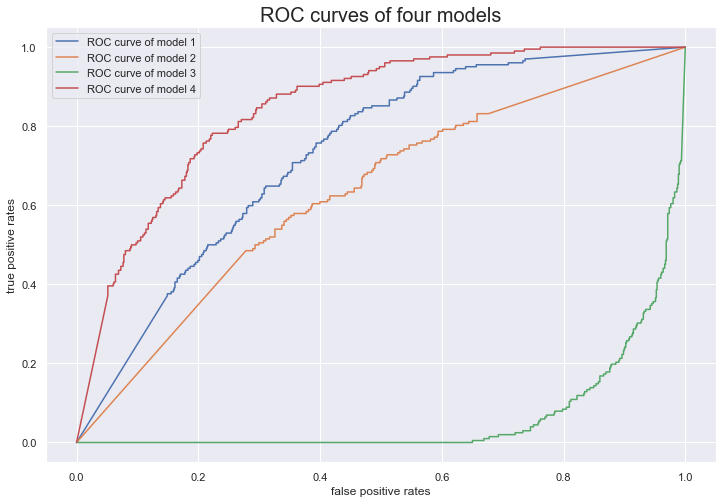

In [54]:
from sklearn import metrics
## generate curve
fpr1, tpr1, thresholds1 = metrics.roc_curve(class_bi['gt'], classification['alg_1'])
fpr2, tpr2, thresholds2 = metrics.roc_curve(class_bi['gt'], classification['alg_2'])
fpr3, tpr3, thresholds3 = metrics.roc_curve(class_bi['gt'], classification['alg_3'])
fpr4, tpr4, thresholds4 = metrics.roc_curve(class_bi['gt'], classification['alg_4'])

## draw plot
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(fpr1,tpr1,label = 'ROC curve of model 1')
ax.plot(fpr2,tpr2,label = 'ROC curve of model 2')
ax.plot(fpr3,tpr3,label = 'ROC curve of model 3')
ax.plot(fpr4,tpr4,label = 'ROC curve of model 4')
ax.legend()
ax.set_title('ROC curves of four models',fontsize=20)
ax.set_xlabel('false positive rates')
ax.set_ylabel('true positive rates')
plt.show()
fig.savefig('q3c')

We can reverse output to improve, set pos_label =1

# Question 5 : (15 total points) Decision Tree Node Splitting

In this question we will explore how node splitting is performed in decision
trees.
Decision tree classiers operate by splitting the input attribute space into multiple subregions, allowing them to represent non-linear decision boundaries. Here we will explore
how potential splits are evaluated.
For this question you will use the dataset contained in faces_train.csv. As a reminder,
the binary class labels of interest are represented by the smiling attribute.

#### (a) (5 points) 
Compute the entropy of the training binary class labels in bits. Is this value
to be expected? You should implement your own entropy function and report your code
along with your answer.
Hint: Be sure that this works even when all the training labels belong to the same class.
You do not need to include all your code (e.g. we do not need to see the data loading
code), just the entropy computation function.

In [55]:
### calculate entropy computation function 
import collections
import math
def caculateEntropy(p1,p0):
    return (-p1*math.log(p1, 2))-(p0*math.log(p0,2))

###get s
# train_smile=faces_train.loc[faces_train['smiling'] ==1.000000]
smiling_train = faces_train['smiling']
p1 = (smiling_train.sum())/(smiling_train.size)
p0=1-p1

In [56]:
HS=caculateEntropy(p1,p0)
print('the entropy of the training binary class labels is :', HS, 'bits' )

the entropy of the training binary class labels is : 0.9994708218806827 bits


#### (b) (5 points)
Plot a 1D histogram of the attribute labelled `x48' from the training set for
the instances where smiling = 0. Create a similar plot for the instances where smiling
= 1. Comment on any dierences or similarities between the two histograms for the
attribute.
Hint: Set the number of bins in the histogram to 100.

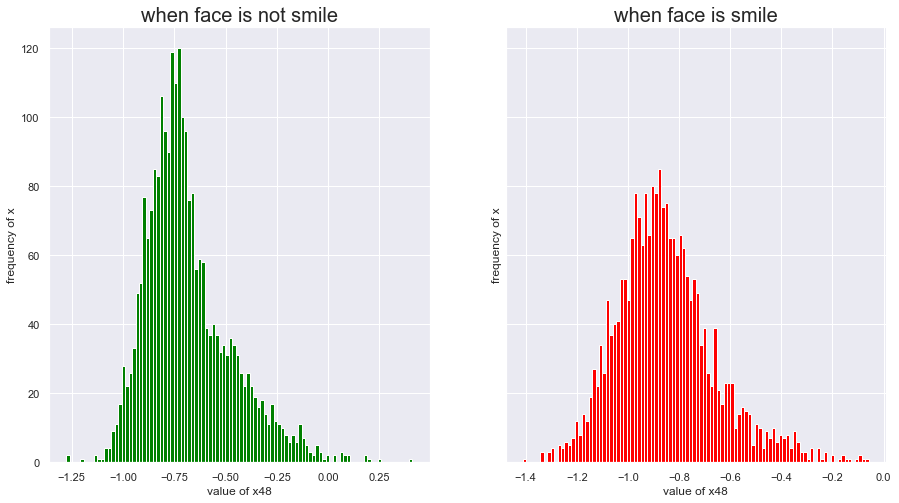

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#### set dataset
## when face is not smiling
unsmile_x48 = train_unsmile['x48']
unsmile_y = train_unsmile['smiling']

## when face is smiling
smile_x48 = train_smile['x48']
unsmile_y = train_smile['smiling']

####draw plot
fig,axs = plt.subplots(1,2,figsize=(15,8),sharey=True)

## when face is not smile
axs[0].hist(unsmile_x48,bins=100,color='green') 
axs[0].set_xlabel('value of x48')
axs[0].set_ylabel('frequency of x')
axs[0].set_title('when face is not smile',fontsize=20)

## when face is smiling
axs[1].hist(smile_x48,bins=100,color='red') 
axs[1].set_xlabel('value of x48')
axs[1].set_ylabel('frequency of x')
axs[1].set_title('when face is smile',fontsize=20)

plt.show()
fig.savefig('q5b')

#### (c) (5 points) 
Compute the information gain resulting from splitting the attribute labelled
`x48' from the training data using splitting thresholds of −0.9 and −0.7. Here, all the
entries that are greater to a threshold t (i.e. > t) are sent to the right child node and all
the entries that are less than or equal to t (i.e. <= t) are sent to the left child node.
Comment on which threshold results in a better split, and why it is better. You can make
reference to your histograms from the previous answer.
Hint: You need to implement your own information gain function. You should report two
separate numbers, one for each threshold. You do not need to include your code.

In [58]:
### function :Gain(S,A) = H(S) − SVS V ∈Values(A )∑ H(SV )
# data = dataframe
# attr = attribute label
# threshold = value of threshold given

## split attribute(right,left) based on the value of threshold
def splitAttr(data,attr,threshold):
    left_node = data.loc[data[attr]<=threshold]['smiling']
    right_node = data.loc[data[attr]>threshold]['smiling']
    return left_node,right_node

## calculate entropy
def cacu_entropy(data):
    p1 = (data.sum())/(data.size)
    p0=1-p1
    return (-p1*math.log(p1, 2))-(p0*math.log(p0,2))

## calculate inforGAIN
##information gain can be calculated as:
##Entropy(Dataset) – (Count(Group1) / Count(Dataset) * Entropy(Group1) + Count(Group2) / Count(Dataset) * Entropy(Group2))
## also can understand it as weight(group) * entropy(group)
def inforGAIN(data,x,left,right):
    entropy_all = cacu_entropy(data[x])
    entropy_left = cacu_entropy(left)
    entropy_right = cacu_entropy(right)
    entropy_con = left.shape[0]/data[x].shape[0]*entropy_left+right.shape[0]/data[x].shape[0]*entropy_right
    return entropy_all -entropy_con

In [59]:
### thresholds = - 0.9
left=splitAttr(faces_train,'x48',-0.9)[0]
right=splitAttr(faces_train,'x48',-0.9)[1]
print('The information gain of -0.9 splitting thresholds is:',inforGAIN(faces_train,'smiling',left,right))

### thresholds = -0.7
left=splitAttr(faces_train,'x48',-0.7)[0]
right=splitAttr(faces_train,'x48',-0.7)[1]
print('The information gain of -0.7 splitting thresholds is:',inforGAIN(faces_train,'smiling',left,right))

The information gain of -0.9 splitting thresholds is: 0.09524001459195264
The information gain of -0.7 splitting thresholds is: 0.05756755146532955


Comment on which threshold results in a better split, and why it is better. You can make
reference to your histograms from the previous answer

<b>My answer here:</b><br>

1. Information gain (IG) measures how much “information” a feature gives us about the class.
2. A larger information gain suggests a lower entropy group and hence less surprise, therefore, -0.9 is better to split thresholds
3. From histograms from the previous answers we could see: when thresholds=-0.9, more x48 varaibles fall under the domain. 